Initial Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2149 entries, 0 to 2148
Data columns (total 35 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   PatientID                  2149 non-null   int64  
 1   Age                        2149 non-null   int64  
 2   Gender                     2149 non-null   int64  
 3   Ethnicity                  2149 non-null   int64  
 4   EducationLevel             2149 non-null   int64  
 5   BMI                        2149 non-null   float64
 6   Smoking                    2149 non-null   int64  
 7   AlcoholConsumption         2149 non-null   float64
 8   PhysicalActivity           2149 non-null   float64
 9   DietQuality                2149 non-null   float64
 10  SleepQuality               2149 non-null   float64
 11  FamilyHistoryAlzheimers    2149 non-null   int64  
 12  CardiovascularDisease      2149 non-null   int64  
 13  Diabetes           

C:\Users\Andreea\AppData\Local\Temp\ipykernel_2172\3428889670.py:53: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=feature_importances, y=features, palette="viridis")


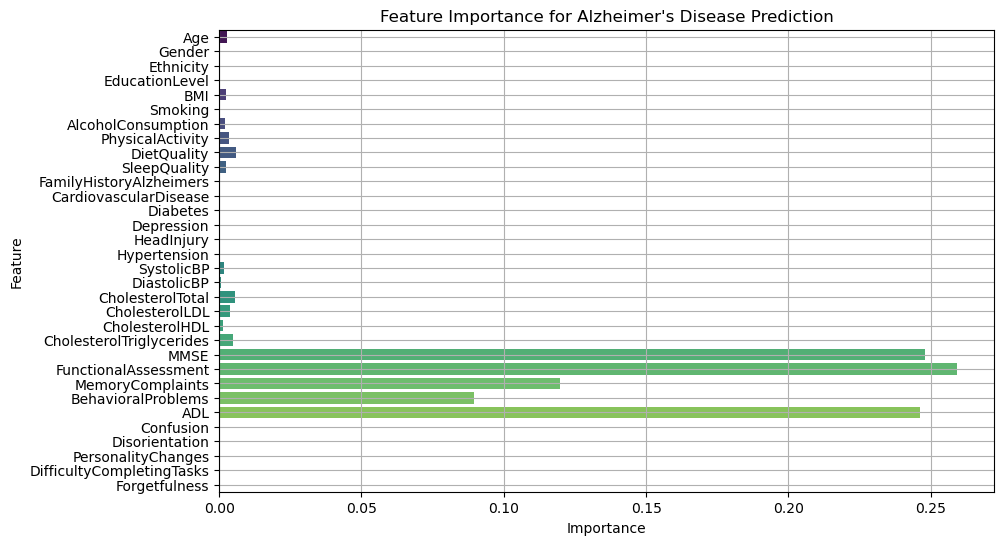

Evaluating model performance...
Model Performance:
Accuracy: 0.9581
Precision: 0.9592
Recall: 0.9216
F1-Score: 0.9400
Evaluating model with cross-validation...
Cross-validation accuracy: 0.9460 ± 0.0664


In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.impute import SimpleImputer
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Load and preprocess the dataset
def load_and_preprocess_data(filepath):
    # Load dataset
    data = pd.read_csv(filepath)
    print("Initial Dataset Information:")
    print(data.info())
    
    # Drop irrelevant or redundant columns
    data = data.drop(columns=['PatientID', 'DoctorInCharge'])  # Drop PatientID and non-predictive features
    
    # Handle missing values for numeric columns (fill with median)
    numeric_cols = data.select_dtypes(include=['float64', 'int64']).columns
    imputer = SimpleImputer(strategy='median')
    data[numeric_cols] = imputer.fit_transform(data[numeric_cols])
    
    # Encode categorical variables to prepare them for modeling
    categorical_cols = data.select_dtypes(include=['object']).columns
    for col in categorical_cols:
        data[col] = LabelEncoder().fit_transform(data[col])
    
   # Normalize numeric columns to have values between 0 and 1
    scaler = MinMaxScaler()
    data[numeric_cols] = scaler.fit_transform(data[numeric_cols])
    
    return data

# Define a function to plot feature importance after training a model
def plot_feature_importance(data, target_column):
    # Separate the features and the target for model training
    X = data.drop(columns=[target_column])
    y = data[target_column]
    
    # Train a GradientBoosting model
    model = GradientBoostingClassifier()
    model.fit(X, y)
    
    # Get feature importance
    feature_importances = model.feature_importances_
    
    # Plot feature importance
    features = X.columns
    plt.figure(figsize=(10, 6))
    sns.barplot(x=feature_importances, y=features, palette="viridis")
    plt.title("Feature Importance for Alzheimer's Disease Prediction")
    plt.xlabel("Importance")
    plt.ylabel("Feature")
    plt.grid(True)
    plt.show()

# Define a function to evaluate the performance of the GradientBoosting model
def evaluate_model_performance(data, target_column):
    # Separate features and target variable
    X = data.drop(columns=[target_column])
    y = data[target_column]
    
    # Split data into train/test sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    
    # Train a GradientBoosting model
    model = GradientBoostingClassifier()
    model.fit(X_train, y_train)
    
    # Predict on the test set
    y_pred = model.predict(X_test)
    
    # Evaluate performance
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    
    print("Model Performance:")
    print(f"Accuracy: {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1-Score: {f1:.4f}")
    
# Define a function to perform cross-validation on the model
def evaluate_model_with_cross_validation(data, target_column):
    # Separate features and target variable
    X = data.drop(columns=[target_column])
    y = data[target_column]
    
    # Cross-validation
    model = GradientBoostingClassifier()
    cv_scores = cross_val_score(model, X, y, cv=5, scoring='accuracy')

    # Print the results of cross-validation
    print(f"Cross-validation accuracy: {cv_scores.mean():.4f} ± {cv_scores.std():.4f}")

# Main function to orchestrate data loading, processing, and evaluation
def main():
    # Define file path
    filepath = "Alzheimer_datasets/alzheimers_disease_data.csv"  
    data = load_and_preprocess_data(filepath)
    
    # Visualize Feature Importance
    print("Visualizing feature importance...")
    plot_feature_importance(data, target_column='Diagnosis') 
    
    # Evaluate Model Performance
    print("Evaluating model performance...")
    evaluate_model_performance(data, target_column='Diagnosis') 
    
    # Perform Cross-Validation
    print("Evaluating model with cross-validation...")
    evaluate_model_with_cross_validation(data, target_column='Diagnosis')

# Check if the current script is the main program and run the main function
if __name__ == "__main__":
    main()


In [10]:
# Import necessary libraries for data handling, machine learning, and image processing
import torch
import numpy as np
import pandas as pd
import cv2
import matplotlib.pyplot as plt
from torch.utils.data import Dataset, DataLoader
from torch import nn, optim
import torch.nn.functional as F
from torchvision import transforms

# Define a function to convert encoded byte data into a usable image format
def convert_dict_to_image(image_dict):
    if 'bytes' in image_dict:
        # Convert byte data to a NumPy array and then decode it to an image
        image_bytes = image_dict['bytes']
        image_array = np.frombuffer(image_bytes, dtype=np.uint8)
        image = cv2.imdecode(image_array, cv2.IMREAD_GRAYSCALE)  # Convert image to grayscale for processing
        return image
    raise ValueError("Dictionary does not contain 'bytes' key")

# Define a custom Dataset class to handle Alzheimer's MRI scan data
class AlzheimerDataset(Dataset):
    def __init__(self, dataframe, transform=None):
        # Initialize dataset properties
        self.dataframe = dataframe
        self.transform = transform  # Transformation operations (resize, normalize, etc.)

    def __len__(self):
        # Return the total number of samples in the dataset
        return len(self.dataframe)

    def __getitem__(self, idx):
        # Retrieve an image by index and apply preprocessing
        image_dict = self.dataframe.iloc[idx]['image']
        image = convert_dict_to_image(image_dict)
        label = int(self.dataframe.iloc[idx]['label'])  # Get the label associated with the image
        if self.transform:
            image = self.transform(image)  # Apply the transformations defined
        return image, label

# Specify image transformations to standardize and optimize network performance
transform = transforms.Compose([
    transforms.ToPILImage(),  # Convert the NumPy image to PIL format for further processing
    transforms.Resize((128, 128)),  # Resize images to ensure consistency
    transforms.ToTensor(),  # Convert images to PyTorch tensors for model input
    transforms.Normalize(mean=[0.5], std=[0.5])  # Normalize images to [0, 1] range
])

# Load and preprocess datasets
df_train = pd.read_parquet('Data/train.parquet')  # Training data
df_test = pd.read_parquet('Data/test.parquet')  # Test data
train_dataset = AlzheimerDataset(df_train, transform=transform)
test_dataset = AlzheimerDataset(df_test, transform=transform)
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)  # Prepare data for batch processing and shuffling

# Map numeric labels to human-readable classes
class_labels = {
    0: 'Mild Demented',
    1: 'Moderate Demented',
    2: 'Non_Demented',
    3: 'Very_Mild_Demented'
}

# Define a simple convolutional neural network for classification
class TinyCNN(nn.Module):
    def __init__(self):
        super(TinyCNN, self).__init__()
        self.conv1 = nn.Conv2d(1, 16, kernel_size=3, padding=1)  # Convolutional layer to extract features
        self.pool = nn.MaxPool2d(2)  # Pooling layer to reduce spatial dimensions
        self.fc = nn.Linear(16 * 64 * 64, 4)  # Fully connected layer to output class predictions

    def forward(self, x):
        # Define the forward pass through the network
        x = self.pool(F.relu(self.conv1(x)))  # Apply ReLU activation after convolution and then pool
        x = x.view(-1, 16 * 64 * 64)  # Flatten the output for the fully connected layer
        x = self.fc(x)  # Compute final output scores for each class
        return x

# Setup the training environment
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")  # Use GPU if available
model = TinyCNN().to(device)  # Instantiate the model and move it to the appropriate device
criterion = nn.CrossEntropyLoss()  # Loss function for classification
optimizer = optim.Adam(model.parameters(), lr=0.001)  # Optimizer with learning rate

# Execute the training process
for epoch in range(10):
    for images, labels in train_loader:
        images, labels = images.to(device), labels.to(device)  # Move data to GPU for faster processing
        optimizer.zero_grad()  # Clear previous gradients
        outputs = model(images)  # Get model predictions
        loss = criterion(outputs, labels)  # Compute loss between predictions and actual labels
        loss.backward()  # Backpropagate the error
        optimizer.step()  # Update model weights
    print(f'Epoch {epoch+1}, Loss: {loss.item()}')  # Output loss for the epoch



Epoch 1, Loss: 0.8421362042427063
Epoch 2, Loss: 0.9405668377876282
Epoch 3, Loss: 0.36078768968582153
Epoch 4, Loss: 0.21727681159973145
Epoch 5, Loss: 0.11799454689025879
Epoch 6, Loss: 0.05928903445601463
Epoch 7, Loss: 0.10383250564336777
Epoch 8, Loss: 0.05570003762841225
Epoch 9, Loss: 0.04378841444849968
Epoch 10, Loss: 0.049021460115909576


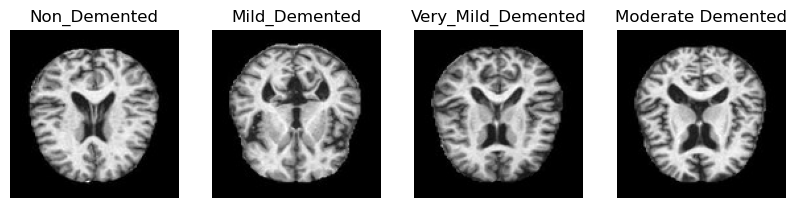

In [7]:
# Get unique labels from the 'label' column of the training dataframe
unique_labels = df_train['label'].unique()
# Initialize a list to store a sample image for each unique label
sample_images = []
# Iterate over each unique label to find and store the first image corresponding to that label
for label in unique_labels:
    for image, img_label in train_dataset:
        if img_label == label:
            sample_images.append((image.numpy().squeeze(), label)) 
            break

# Setup for visualizing one image per class
plt.figure(figsize=(10, 2.5))
# Loop over the sample images to plot them
for i, (image, label) in enumerate(sample_images): # Enumerate provides a counter (i) and the image-label tuple
    ax = plt.subplot(1, len(unique_labels), i + 1) # Create a subplot for each image
    ax.imshow(image, cmap='gray') # Display the image in grayscale
    ax.set_title(f'{class_labels[label]}') # Set the title of each subplot to the class label of the image
    ax.axis('off')
plt.show()

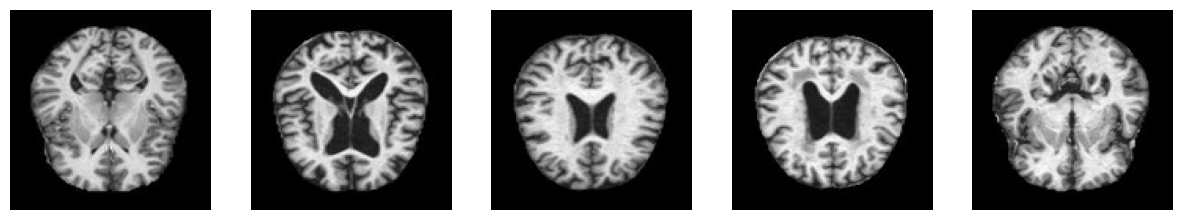

In [8]:
# Visualizing a random sample of images from the test set
sample_images = df_test['image'].apply(convert_dict_to_image).sample(5) # Apply a function to convert images from dictionary format to actual images and then randomly select 5 images
plt.figure(figsize=(15, 3)) # Set the size of the figure for displaying images
# Loop through each image in the sampled images
for i, image in enumerate(sample_images): # Enumerate provides an index (i) and the image object
    plt.subplot(1, 5, i + 1)  # Create a subplot for each image; arguments mean 1 row, 5 columns, and the i-th subplot respectively
    plt.imshow(image, cmap='gray') # Display the image in grayscale
    plt.axis('off') 
plt.show()

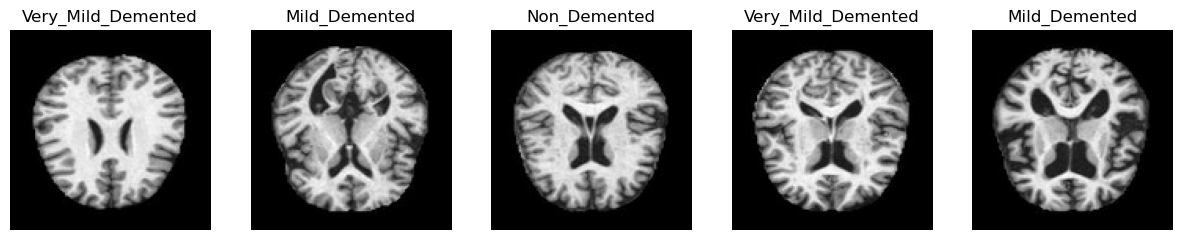

In [109]:
import matplotlib.pyplot as plt

plt.figure(figsize=(15, 3)) # Set the size of the plot to be created
sample_images = [convert_dict_to_image(img) for img in df_test['image'].sample(5)] # Create a list of images by converting five randomly sampled images from the test set
sample_predictions = predictions[:5]  # Predictions for the selected images # Extract the first five predictions from the predictions list for the selected images

# Loop through each sampled image and its corresponding prediction
for i, (image, pred) in enumerate(zip(sample_images, sample_predictions)):
    plt.subplot(1, 5, i + 1) # Create a subplot for each image; arguments mean 1 row, 5 columns, and the i-th subplot respectively
    plt.imshow(image, cmap='gray') # Display the image in grayscale
    plt.title(f'{class_labels.get(pred, "Unknown")}')  # Custom format with number before the label
    plt.axis('off')
plt.show()


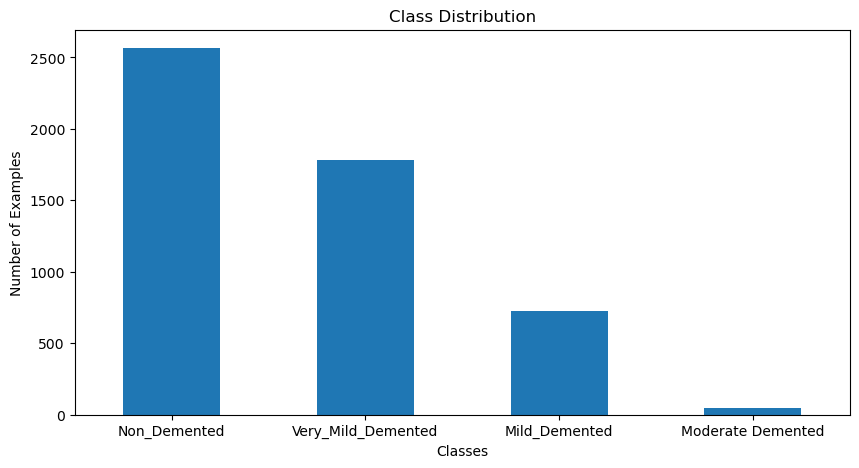

In [113]:
import matplotlib.pyplot as plt


# Calculating the class distribution
class_distribution = df_train['label'].value_counts().rename(index=class_labels)

# Visualizing the distribution
plt.figure(figsize=(10, 5))
class_distribution.plot(kind='bar')
plt.title('Class Distribution')
plt.xlabel('Classes')
plt.ylabel('Number of Examples')
plt.xticks(rotation=0) 
plt.show()


